# Mall Customers Data Analysis

This evaluates the clustering performance of KMeans clustering, Hierarchical (Agglomerative) Clustering,  Density-Based Spatial (DBSCAN) Clustering on a mall customers dataset

In [ ]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (200, 5)

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Exploratory Data Analysis and Preprocessing

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Encode Gender feature
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


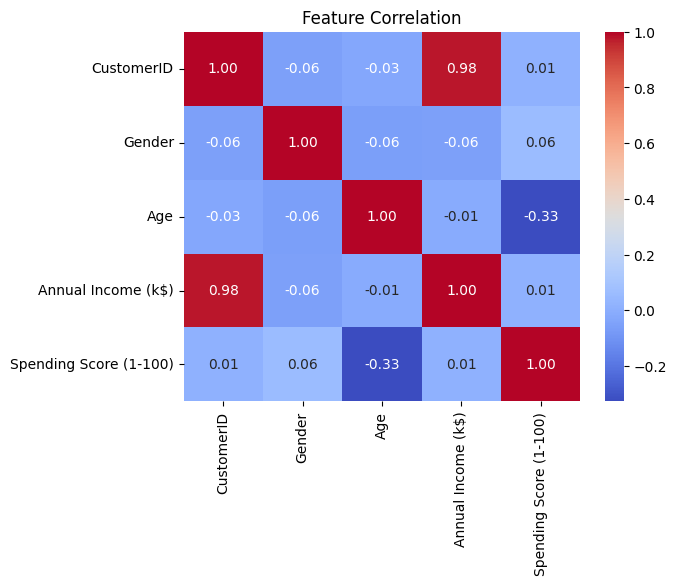

In [ ]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

There is a stong linear correlation between the customer ID. That could indicate the customer ID were not assigned randomly but rather according to the Annual Income (k$). The feature correlation show no strong linear correlation between the features.

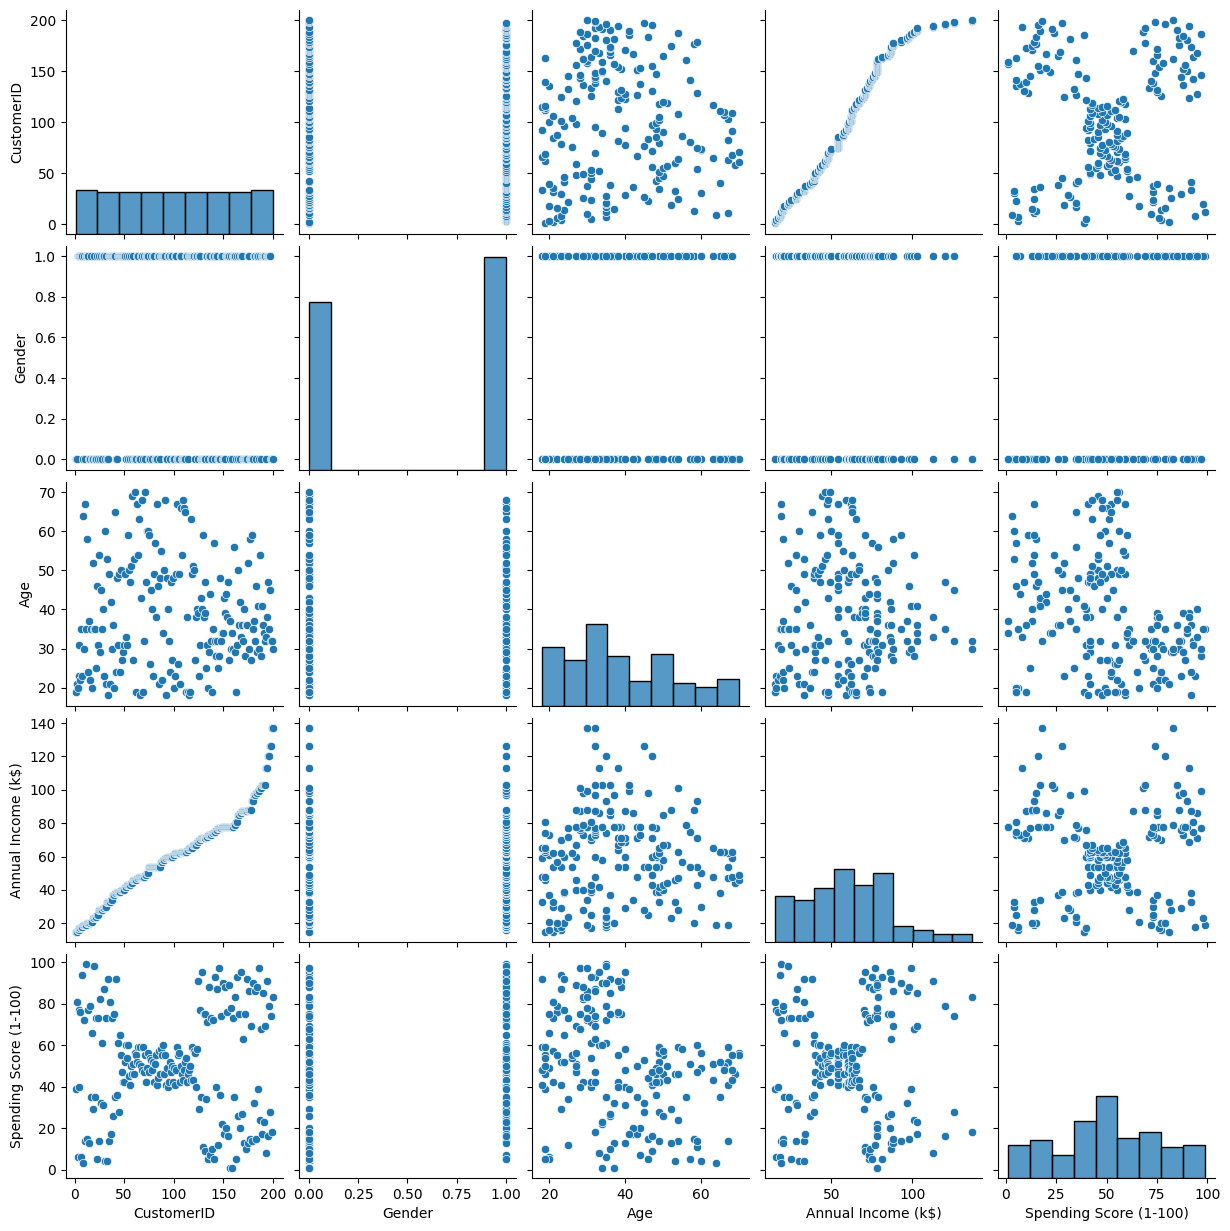

In [ ]:
# The Pairplot provides a scatter plot of the relationship between every variable
# The diagonal also provides histograms of kernel density plots
sns.pairplot(data=df)

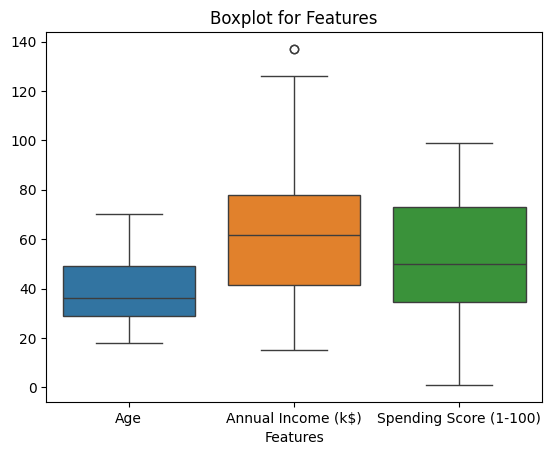

In [ ]:
box_features = df.drop(['CustomerID', 'Gender'], axis='columns')
sns.boxplot(data=box_features)
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

In [ ]:
# Select some features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering

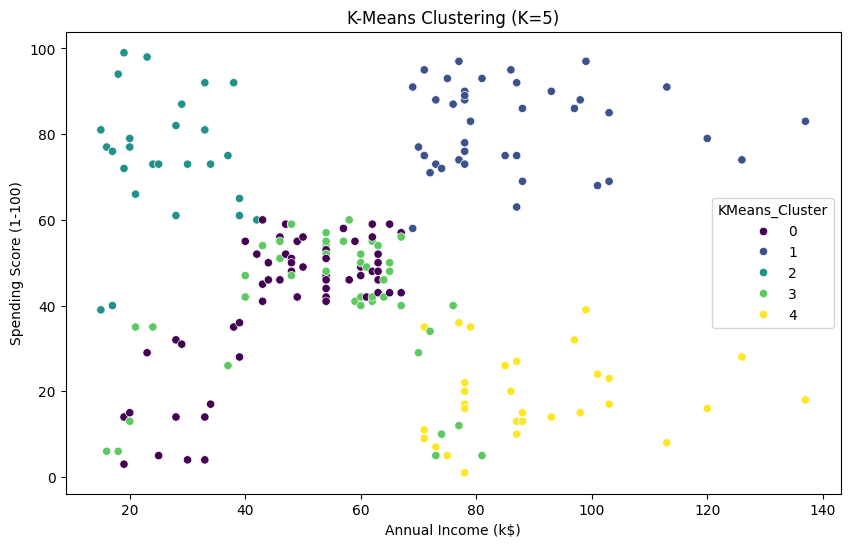

In [ ]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

## Hierarchial Clustering

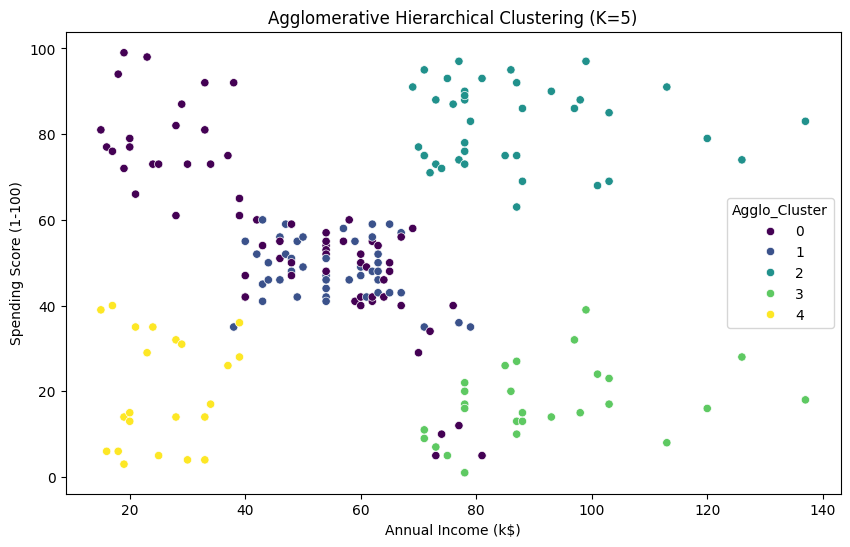

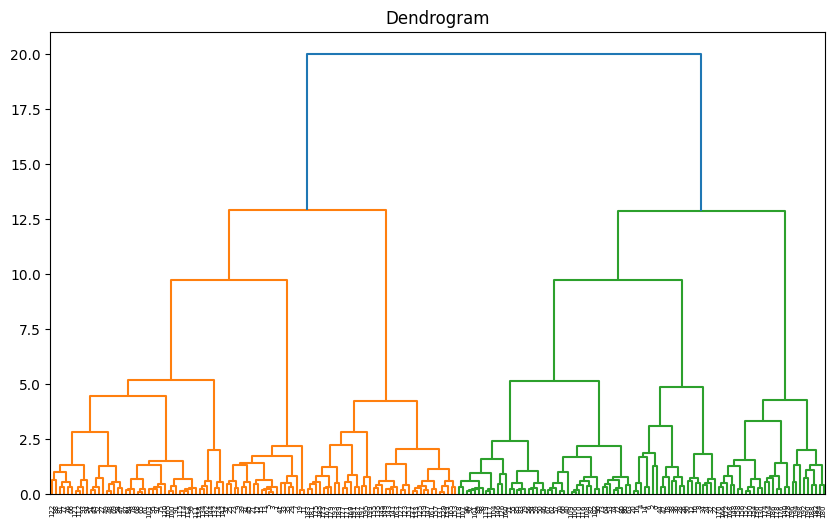

In [ ]:
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

## DBSCAN

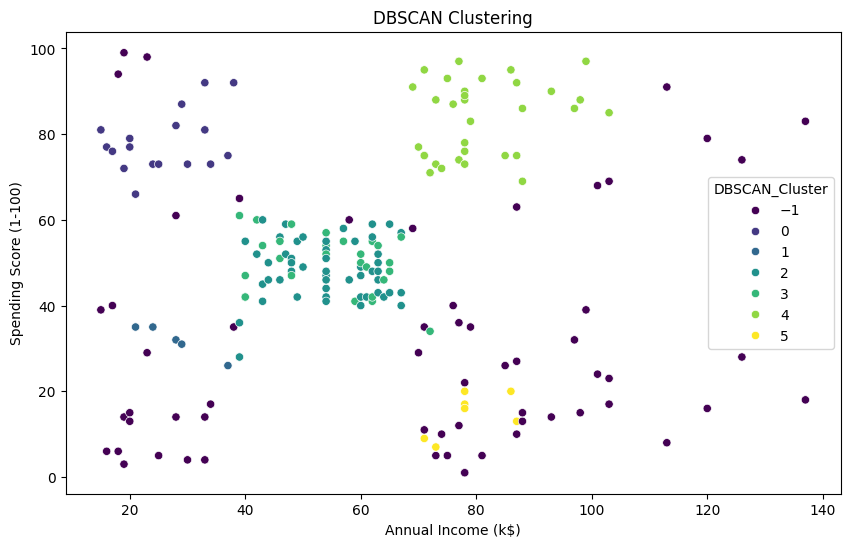

In [ ]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

## Evaluating Clustering Performance

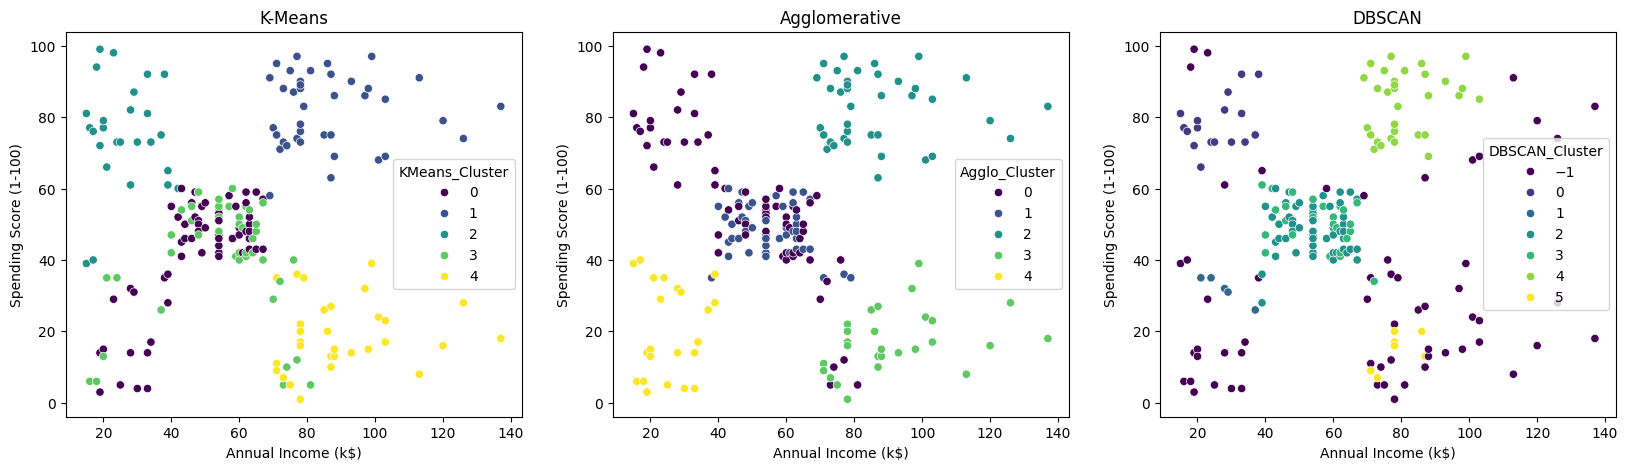

In [ ]:
# Comparing the Clusters Visually
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.set_title('K-Means')
ax2.set_title('Agglomerative')
ax3.set_title('DBSCAN')


# Visualize K-Means Clustering
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis', ax=ax1)

# Visualize Agglomerative Hierarchical Clustering
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='viridis', ax=ax2)

# Visualize DBSCAN Clustering
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', ax=ax3)
plt.show()

Although the K-Means clustering and Agglomerative clustering have the same number of clusters, the clusters that overlap are different. In the K-Means cluster 1 and 3 overlap in the Agglomerative clustering  cluster 0 and 1 overlap. The clusters of the K-Means clustering and Agglomerative clustering have arbitrary and irregular shapes. With the exception of the overlaping clusters in the K-Means clustering and Agglomerative clustering method and exhibit seperation, varying sizes.

The DBSCAN clustering produced clusters of varying sizes, with poorly defined boundries and overlaping.

In [ ]:
# Silhouette Score
KMeans_SS = silhouette_score(X_scaled, kmeans.labels_)
Agglo_SS = silhouette_score(X_scaled, agglo.labels_)
DBSCAN_SS = silhouette_score(X_scaled, dbscan.labels_)
SS = [KMeans_SS, Agglo_SS, DBSCAN_SS]
print("\nK-Means Silhouette Score:", KMeans_SS )
print("Agglomerative Silhouette Score:", Agglo_SS )
print("DBSCAN Silhouette Score:", DBSCAN_SS )



K-Means Silhouette Score: 0.40846873777345605
Agglomerative Silhouette Score: 0.39002826186267214
DBSCAN Silhouette Score: 0.18451372756506046


In [ ]:
# Calinski-Harabasz Index
KMeans_CHI = calinski_harabasz_score(X_scaled, kmeans.labels_)
Agglo_CHI = calinski_harabasz_score(X_scaled, agglo.labels_)
DBSCAN_CHI = calinski_harabasz_score(X_scaled, dbscan.labels_)
CHI = [KMeans_CHI, Agglo_CHI, DBSCAN_CHI]
print("\nK-Means Calinski-Harabasz Index:", KMeans_CHI )
print("Agglomerative Calinski-Harabasz Index:", Agglo_CHI )
print("DBSCAN Calinski-Harabasz Index:", DBSCAN_CHI )


K-Means Calinski-Harabasz Index: 123.41870976849417
Agglomerative Calinski-Harabasz Index: 107.82656032570374
DBSCAN Calinski-Harabasz Index: 34.07053246361936


In [ ]:
# Davis-Bouldin Index
KMeans_DBI = davies_bouldin_score(X_scaled, kmeans.labels_)
Agglo_DBI = davies_bouldin_score(X_scaled, agglo.labels_)
DBSCAN_DBI = davies_bouldin_score(X_scaled, dbscan.labels_)
DBI = [KMeans_DBI, Agglo_DBI, DBSCAN_DBI]
print("\nK-Means Davies-Bouldin Index:", KMeans_DBI)
print("Agglomerative Davies-Bouldin Index:", Agglo_DBI)
print("DBSCAN Davies-Bouldin Index:", DBSCAN_DBI)


K-Means Davies-Bouldin Index: 0.8889693268899006
Agglomerative Davies-Bouldin Index: 0.9162886109753661
DBSCAN Davies-Bouldin Index: 1.7569458461701164


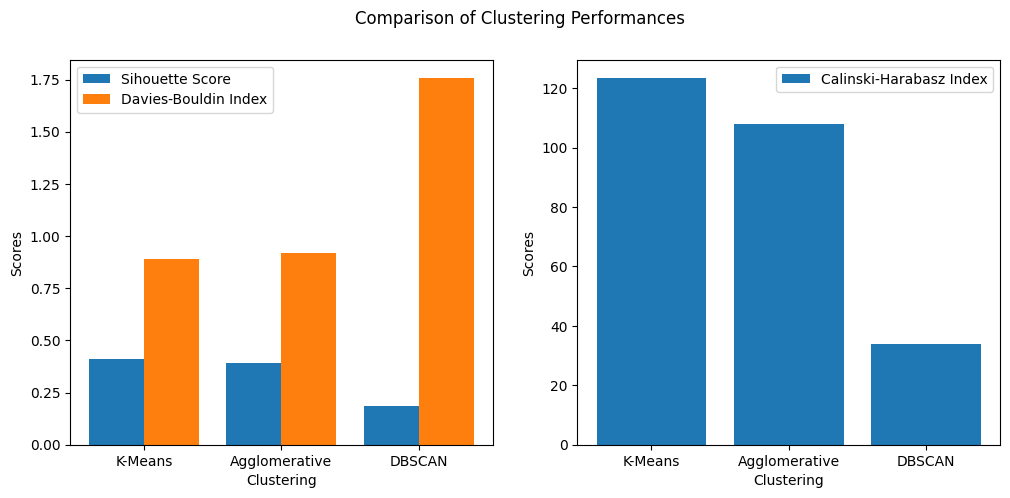

In [ ]:
# Visual Comparison of Metrics
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Comparison of Clustering Performances')

positions = np.arange(3)
bar_width = 0.4  # Reduced width to fit bars

# Plot bars with appropriate spacing
ax1.bar(positions - 0.5 * bar_width, SS, width=bar_width, label='Sihouette Score')
ax1.bar(positions + 0.5 * bar_width, DBI, width=bar_width, label='Davies-Bouldin Index')


ax2.bar(['K-Means', 'Agglomerative', 'DBSCAN'],CHI,label='Calinski-Harabasz Index')
# Adding labels and title
ax1.set_xlabel('Clustering')
ax2.set_xlabel('Clustering')
ax1.set_ylabel('Scores')
ax2.set_ylabel('Scores')


# Adding legend and xticks
ax1.legend()
ax2.legend()
ax1.set_xticks(positions, ['K-Means', 'Agglomerative', 'DBSCAN'])
ax2.set_xticks(positions, ['K-Means', 'Agglomerative', 'DBSCAN'])
plt.show()

###Evaluation of the Clustoring scores

###Silhouette Scores:(range -1(poor) to 1(perfect))
Each clustering algorithm has a positive score indicating that the clusters are not completely overlapping. However they each have a score underneath 0.5, indicating poor and somewhat unclear seperation between clusters. The K-Means Clustering had the best seperation and the DBSCAN performed the worst.


###Calinski-Harabasz Index Scores: higher index better defined clusters.
The visualization indicate that the K-Means clustering has the best cluster definition and qualityl, followed by the Agglomerative clustering. Finallly the DBSCAN clustering performed significantly worse than the other two algorithms.


###Davies-Bouldin Index Scores: ideally close to 0
The Davies Bouldin Index score for the K-Means and Agglomerative clustering were similar (0.89 and 0.92) below one indicate better defined clusters. Which could possibly indicate smaller intra-cluster distances and larger inter-cluster distances. The DBSCAN performed the worst with a 1.76 score.

###Final Recommendation
The K-Means clustering, according the Silhouette, Calinski-Harabasz Index and Davies-Bouldin Index score, performed the best. Additionally because of its computationaly efficiency and scalability it would be the best option for clustering the Mall Customers dataset. However the K-Means clustering can be further improved by choosing the best number of clusters.

Finding the Optimal Number of Clusters

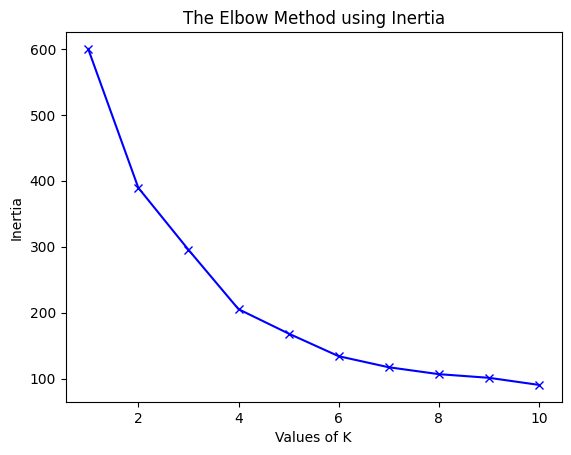

In [ ]:
# The Elbow Method
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


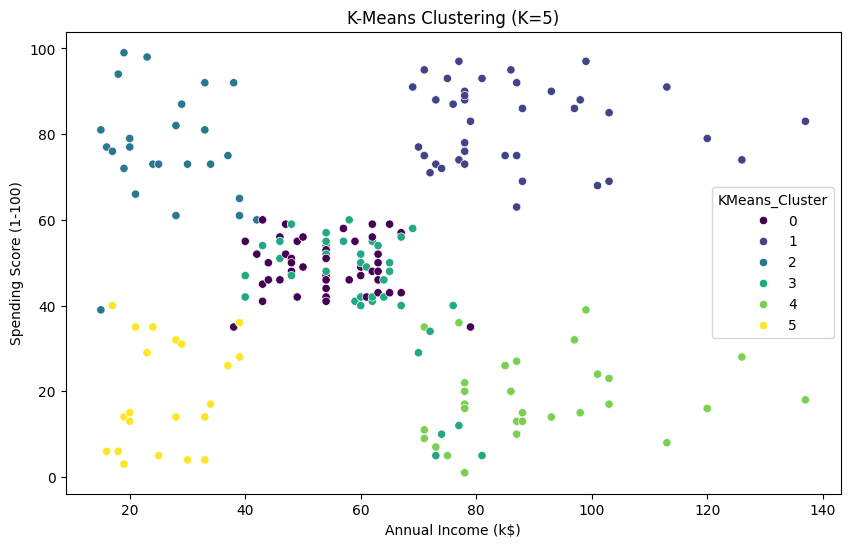

In [ ]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

In [ ]:
# Evaluating K-Means Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))





K-Means Silhouette Score: 0.43106526216603014

K-Means Calinski-Harabasz Index: 134.47517082663606

K-Means Davies-Bouldin Index: 0.8349663784782569


K-Means Silhouette Score: 0.43106526216603014   (Previosly:0.40846873777345605 )  IMPROVED

K-Means Calinski-Harabasz Index: 134.47517082663606   (Previosly: 123.41870976849417 )   IMPROVED

K-Means Davies-Bouldin Index: 0.8349663784782569   (Previosly: 0.8889693268899006 )   IMPROVED